In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-75.61094182947512 151.39201703860698
-10.0964124219865 -157.7954958713001
-0.5213776042667888 19.768951995261318
25.91657867337122 165.7137714379075
39.991720731905104 -107.5809640086477
-17.409532088891766 -106.687561740795
-14.33056070476583 -64.07515501743272
24.726986989486235 -86.58851128000109
40.407989210964615 -60.60200685691781
22.567436885913963 -8.252586038000999
-11.59150610465133 -48.442689691522986
3.97556082784763 161.16893768275554
-63.58750384506833 117.81510037943599
-24.94229335462424 65.56967502292545
37.402614949696186 99.63644486179726
-34.85649002790984 -29.764426493334554
-84.50806211800176 -64.25727561881327
22.573332150563346 -58.3173713676362
-31.81670238807658 112.0923578045435
78.82333410876902 43.6719898764882
43.92865280066411 -75.6492903132808
-56.28881401320067 -162.46005401158232
-50.40407401112248 165.01286449707504
65.91348046323469 134.82752948653496
17.331384069904885 -130.58009610908925
-81.66542949944264 6.968921820116293
-39.76685130205254 110.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
import requests
requests.__version__

'2.27.1'

In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lardos
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | sechura
Processing Record 4 of Set 1 | caucaia
Processing Record 5 of Set 1 | camocim
Processing Record 6 of Set 1 | oranjemund
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | bao
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | izumo
Processing Record 39 of Set 4 | bada
Processing Record 40 of Set 4 | riyadh
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | gamba
Processing Record 44 of Set 4 | natchitoches
Processing Record 45 of Set 4 | portlethen
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | san miguel
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | zaria
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | tazovskiy
Processing Record 3 of Set 5 | cartagena
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | noyabrsk
Processing Record 8 of Set 5 | bloemfontein
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 

Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 33 of Set 8 | chagda
City not found. Skipping...
Processing Record 34 of Set 8 | manokwari
Processing Record 35 of Set 8 | sosnovo-ozerskoye
Processing Record 36 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 37 of Set 8 | ossora
Processing Record 38 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | hsinying
City not found. Skipping...
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | buluang
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | kambove
Processing Record 45 of Set 8 | douentza
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | maragogi
Processing Record 48 of Set 8 | timra
Processing Record 49 of Set 8 | northam
Processing Record 50 of Set 8 | tiznit
Processin

Processing Record 13 of Set 12 | parczew
Processing Record 14 of Set 12 | kiama
Processing Record 15 of Set 12 | taveta
Processing Record 16 of Set 12 | bealanana
Processing Record 17 of Set 12 | saldanha
Processing Record 18 of Set 12 | opunake
Processing Record 19 of Set 12 | san andres
Processing Record 20 of Set 12 | cedar city
Processing Record 21 of Set 12 | pula
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | nishihara
Processing Record 24 of Set 12 | kijang
Processing Record 25 of Set 12 | kencong
Processing Record 26 of Set 12 | belaya gora
Processing Record 27 of Set 12 | wuxi
Processing Record 28 of Set 12 | bubaque
Processing Record 29 of Set 12 | lahat
Processing Record 30 of Set 12 | san policarpo
Processing Record 31 of Set 12 | makakilo city
Processing Record 32 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 12 | baoning
Processing Record 34 of Set 12 | maraa
Processing Record 35 of Set 12 | krasnoselkup
Processing 

In [26]:
len(city_data)

579

In [3]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [2]:
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

NameError: name 'city_data_df' is not defined

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

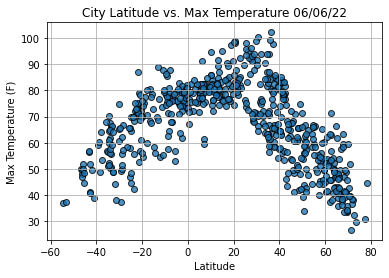

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

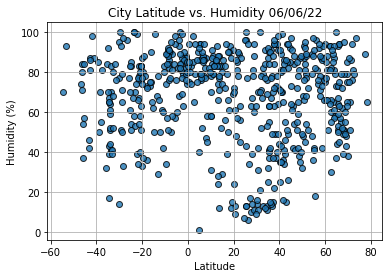

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

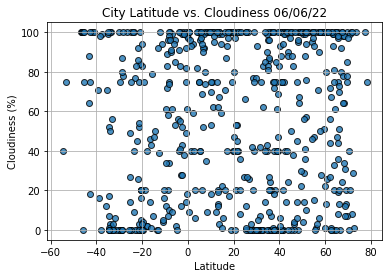

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

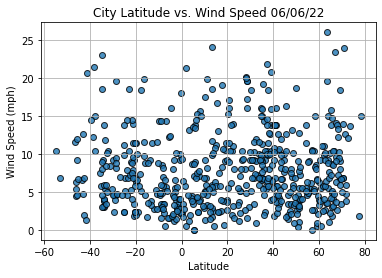

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-06-06 20:05:50
Lat                         -46.6
Lng                      168.3333
Max Temp                     49.8
Humidity                       74
Cloudiness                    100
Wind Speed                  11.63
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lardos,GR,2022-06-06 20:04:15,36.0942,28.0157,80.42,67,7,14.38
1,Nikolskoye,RU,2022-06-06 20:07:22,59.7035,30.7861,53.49,75,22,4.50
7,Provideniya,RU,2022-06-06 20:07:28,64.3833,-173.3000,46.83,58,61,1.03
8,Bao,PH,2022-06-06 20:07:30,13.6414,122.8314,81.09,77,67,2.44
9,Ponta Do Sol,PT,2022-06-06 20:07:31,32.6667,-17.1000,72.23,82,83,0.94


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

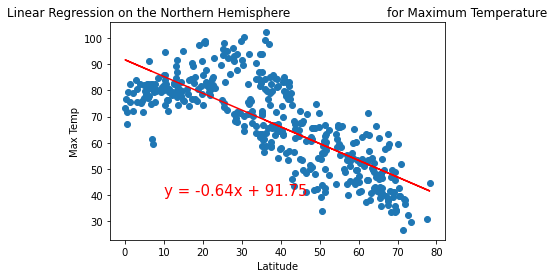

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

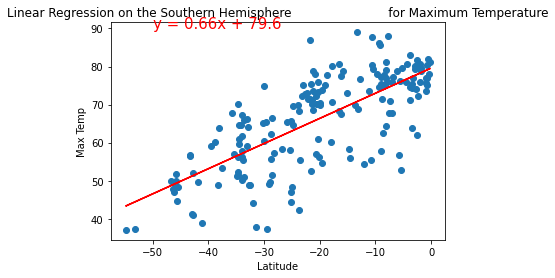

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

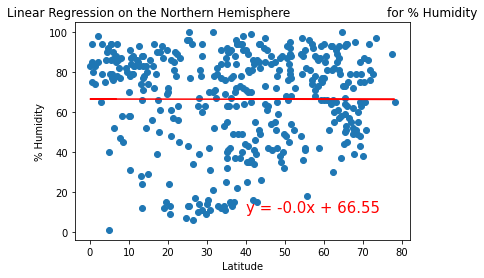

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

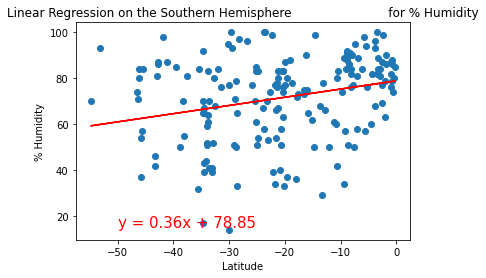

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

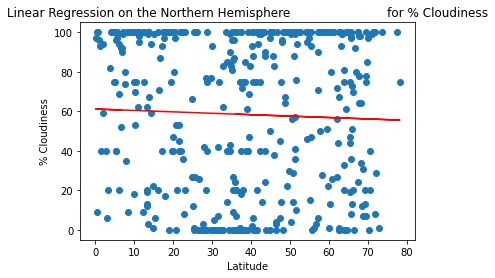

In [44]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

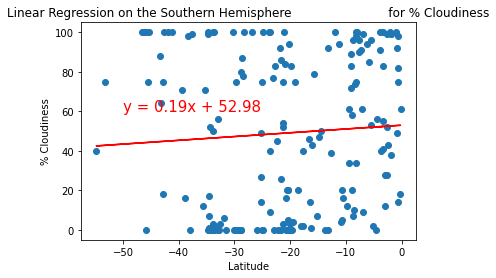

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

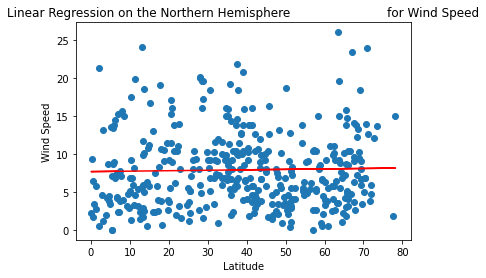

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

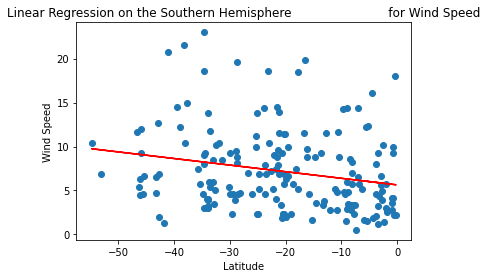

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [4]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [5]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lardos,GR,2022-06-06 20:04:15,36.0942,28.0157,80.42,67,7,14.38
1,1,Nikolskoye,RU,2022-06-06 20:07:22,59.7035,30.7861,53.49,75,22,4.50
2,2,Sechura,PE,2022-06-06 20:07:24,-5.5569,-80.8222,76.30,57,53,12.21
3,3,Caucaia,BR,2022-06-06 20:03:25,-3.7361,-38.6531,83.03,68,40,8.05
4,4,Camocim,BR,2022-06-06 20:07:26,-2.9022,-40.8411,79.25,84,28,5.57


In [6]:
# Get the data types.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [7]:
# Configure gmaps to use your Google API key.

gmaps.configure(api_key=g_key)

In [8]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [10]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds= city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

NameError: name 'city_data_df' is not defined

In [15]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [16]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lardos,GR,2022-06-06 20:04:15,36.0942,28.0157,80.42,67,7,14.38
2,2,Sechura,PE,2022-06-06 20:07:24,-5.5569,-80.8222,76.30,57,53,12.21
3,3,Caucaia,BR,2022-06-06 20:03:25,-3.7361,-38.6531,83.03,68,40,8.05
4,4,Camocim,BR,2022-06-06 20:07:26,-2.9022,-40.8411,79.25,84,28,5.57
8,8,Bao,PH,2022-06-06 20:07:30,13.6414,122.8314,81.09,77,67,2.44
18,18,Hithadhoo,MV,2022-06-06 20:07:36,-0.6000,73.0833,82.00,74,98,2.21
22,22,Avarua,CK,2022-06-06 20:07:37,-21.2078,-159.7750,78.85,83,75,11.50
25,25,Puerto Ayora,EC,2022-06-06 20:07:40,-0.7393,-90.3518,75.16,86,82,10.00
26,26,Kapoeta,SS,2022-06-06 20:07:41,4.7717,33.5903,82.27,40,100,4.45
27,27,Bambanglipuro,ID,2022-06-06 20:07:42,-7.9500,110.2833,75.92,90,100,3.40


In [18]:
preferred_cities_df.count()

City_ID       186
City          186
Country       186
Date          186
Lat           186
Lng           186
Max Temp      186
Humidity      186
Cloudiness    186
Wind Speed    186
dtype: int64

In [32]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)


,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Lardos,GR,80.42,36.0942,28.0157,
2,Sechura,PE,76.30,-5.5569,-80.8222,
3,Caucaia,BR,83.03,-3.7361,-38.6531,
4,Camocim,BR,79.25,-2.9022,-40.8411,
8,Bao,PH,81.09,13.6414,122.8314,
18,Hithadhoo,MV,82.00,-0.6000,73.0833,
22,Avarua,CK,78.85,-21.2078,-159.7750,
25,Puerto Ayora,EC,75.16,-0.7393,-90.3518,
26,Kapoeta,SS,82.27,4.7717,33.5903,
27,Bambanglipuro,ID,75.92,-7.9500,110.2833,


In [33]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [34]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [35]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEDTwieaX20N6RNtBKcI4Ho8aXVFkwBF9R4TV-EqRSpeIDId1UQZd64bTi7Sx092H4Njp8dkGOgjYJMzSofxRYkvkY6z98V_ryNBUfiZTcB8JPRRXLwpLNj0_0ITXDEWLdTaBs6RpP1xzmNGmdC61nNZUzS2qRFVJHpnIcqoJuXehO-mYBmRWeXKTHIun1sLoMq44LdTW_jQbbtD3Jfc68Fv1S99sYMeqSiKMYnylMsGIKS-HkwuMNfAHhF5O4G9orX0Xsx866OHb8-nwaSNknsGD5z_kTU3sHT-TqWXu6fYgYeHytRhSXgtMw-LHznmXt2Rc0Xl-CTWzusQixMsdC8VlbD144NZhcVSI0cWfhZbUicJio9WXOF6QnU7P5QtfpfxA7MCkc_10BGjR-68UvIgHn1rHNlMMq5zxwR3f4sRgFS2jxE_MJLK',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [36]:
len(hotels["results"])


20

In [9]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
# Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

NameError: name 'hotel_df' is not defined

In [38]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))